In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [34]:
from tensorflow.keras.datasets import cifar10

In [35]:
(x_train,y_train), (x_test,y_test) = cifar10.load_data()

In [36]:
x_train.shape 

(50000, 32, 32, 3)

Here its a coloured image, thats why we have the rgb color channel so 3 is present at the last

In [37]:
x_train[0].shape

(32, 32, 3)

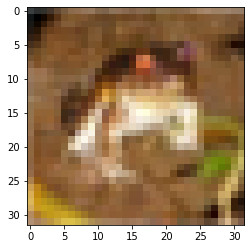

In [38]:
plt.imshow(x_train[0])

This is an image of a frog

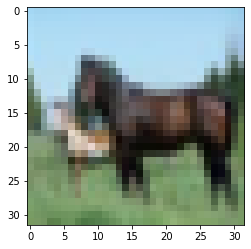

In [39]:
plt.imshow(x_train[12])

Now these images have just enough information for a human to detect what it is

In [40]:
x_train[0].max()

255

So its clear that the max value upto which each image data goes upto is 255

So for the data pre-processing, let's divide our x_train and x_test by 255

In [41]:
x_train = x_train / 255

In [42]:
x_test = x_test / 255

In [43]:
x_test.shape

(10000, 32, 32, 3)

there are 10000 images in the test set

In [44]:
y_train

array([[6],
       [9],
       [9],
       ...,
       [9],
       [1],
       [1]], dtype=uint8)

In [45]:
y_test

array([[3],
       [8],
       [8],
       ...,
       [5],
       [1],
       [7]], dtype=uint8)

So we have integer values in them basically. Again we don't want our CNN to consider these as continuous values, but to be categorized properly. Hence we need to encode these values.

In [46]:
from tensorflow.keras.utils import to_categorical

In [50]:
y_cat_train = to_categorical(y_train, num_classes = 10)

In [51]:
y_cat_test = to_categorical(y_test, num_classes=10)

In [52]:
y_train[0]

array([6], dtype=uint8)

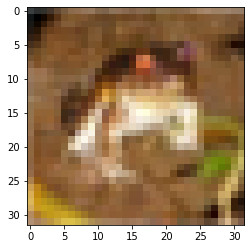

In [53]:
plt.imshow(x_train[0])

We have a frog here, and that is corresponding to the number 6(according to y_train[0]). So according to the CIFAR-10 dataset, the output is like this:
The 10 different classes represent airplanes, cars, birds, cats, deer, dogs, frogs, horses, ships, and trucks
So 0 is airplane, 1 is car, 2 is bird and so on...

We don't have to do any reshaping here as its already a coloured images dataset, so there's a separate dimension specified for the colour channel

In [54]:
from tensorflow.keras.models import Sequential

In [55]:
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten
#We are importing a convolutional layer, pooling layer and finally going to flatten that layer

In [56]:
32*32*3
#This is the total number of info contained in every image. So its a good idea to add more convolutional and pooling layers.

3072

In [59]:
model = Sequential()

#CONVOLUTIONAL LAYER
model.add(Conv2D(filters = 32, kernel_size = (4,4), input_shape = (32,32,3), activation = 'relu'))
#POOLING LAYER
model.add(MaxPool2D(pool_size = (2,2)))

#CONVOLUTIONAL LAYER
model.add(Conv2D(filters = 32, kernel_size = (4,4), input_shape = (32,32,3), activation = 'relu'))
#POOLING LAYER
model.add(MaxPool2D(pool_size = (2,2)))

model.add(Flatten())

model.add(Dense(256,activation = 'relu'))

model.add(Dense(10,activation = 'softmax'))

model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

In [60]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 29, 29, 32)        1568      
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 14, 14, 32)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 11, 11, 32)        16416     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 5, 5, 32)         0         
 2D)                                                             
                                                                 
 flatten_2 (Flatten)         (None, 800)               0         
                                                                 
 dense_4 (Dense)             (None, 256)              

In [61]:
from tensorflow.keras.callbacks import EarlyStopping

In [62]:
early_stop = EarlyStopping(monitor = 'val_loss', patience = 2)

In [64]:
model.fit(x_train,y_cat_train, epochs = 15, validation_data = (x_test, y_cat_test), callbacks = [early_stop])

Epoch 1/15
1563/1563 [==============================] - 27s 17ms/step - loss: 1.2265 - accuracy: 0.5673 - val_loss: 1.1362 - val_accuracy: 0.5993
Epoch 2/15
1563/1563 [==============================] - 27s 17ms/step - loss: 1.0498 - accuracy: 0.6351 - val_loss: 1.0850 - val_accuracy: 0.6267
Epoch 3/15
1563/1563 [==============================] - 26s 17ms/step - loss: 0.9226 - accuracy: 0.6787 - val_loss: 1.0193 - val_accuracy: 0.6466
Epoch 4/15
1563/1563 [==============================] - 26s 17ms/step - loss: 0.8353 - accuracy: 0.7071 - val_loss: 0.9550 - val_accuracy: 0.6678
Epoch 5/15
1563/1563 [==============================] - 26s 17ms/step - loss: 0.7471 - accuracy: 0.7383 - val_loss: 0.9526 - val_accuracy: 0.6763
Epoch 6/15
1563/1563 [==============================] - 26s 17ms/step - loss: 0.6683 - accuracy: 0.7652 - val_loss: 0.9604 - val_accuracy: 0.6846
Epoch 7/15
1563/1563 [==============================] - 26s 17ms/step - loss: 0.5969 - accuracy: 0.7908 - val_loss: 0.9960 -

In [65]:
metrics = pd.DataFrame(model.history.history)

In [66]:
metrics

,loss,accuracy,val_loss,val_accuracy
0,1.226529,0.56728,1.136153,0.5993
1,1.049824,0.63508,1.084959,0.6267
2,0.922593,0.67868,1.019291,0.6466
3,0.835257,0.70712,0.954997,0.6678
4,0.747056,0.73828,0.952582,0.6763
5,0.668285,0.76524,0.960404,0.6846
6,0.596874,0.79080,0.996006,0.6811


<AxesSubplot:>

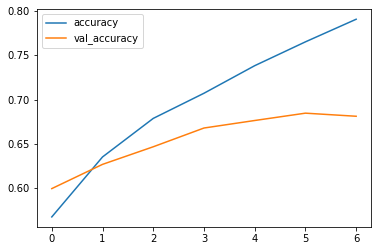

In [67]:
metrics[['accuracy','val_accuracy']].plot()

<AxesSubplot:>

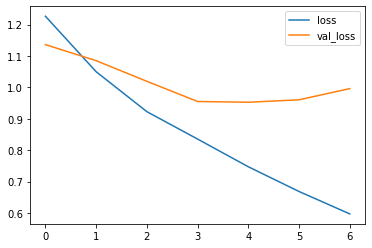

In [68]:
metrics[['loss', 'val_loss']].plot()

In [69]:
model.evaluate(x_test,y_cat_test)

313/313 [==============================] - 2s 5ms/step - loss: 0.9960 - accuracy: 0.6811


[0.9960060715675354, 0.6811000108718872]

In [70]:
from sklearn.metrics import classification_report, confusion_matrix

In [79]:
predictions = model.predict(x_test)
predictions = np.argmax(predictions,axis=1)

In [80]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.70      0.77      0.73      1000
           1       0.77      0.83      0.80      1000
           2       0.68      0.50      0.58      1000
           3       0.49      0.50      0.49      1000
           4       0.65      0.59      0.62      1000
           5       0.65      0.52      0.58      1000
           6       0.71      0.80      0.75      1000
           7       0.65      0.79      0.71      1000
           8       0.86      0.70      0.77      1000
           9       0.69      0.80      0.74      1000

    accuracy                           0.68     10000
   macro avg       0.68      0.68      0.68     10000
weighted avg       0.68      0.68      0.68     10000



In [81]:
confusion_matrix(y_test,predictions)

array([[768,  32,  36,  20,  18,   5,   7,  21,  31,  62],
       [ 28, 831,   4,  13,   1,   3,  11,   2,  18,  89],
       [ 74,  14, 503,  83,  94,  54,  75,  69,  11,  23],
       [ 24,  21,  43, 503,  59, 140,  84,  72,  13,  41],
       [ 24,  12,  45,  72, 588,  30,  80, 117,  16,  16],
       [ 13,  11,  40, 201,  55, 522,  41,  93,   5,  19],
       [  8,  10,  29,  69,  34,  12, 799,  19,   5,  15],
       [ 15,  10,  20,  39,  43,  29,  14, 791,   3,  36],
       [119,  44,  12,  21,   4,   8,   8,  17, 703,  64],
       [ 32,  97,  10,  14,   3,   4,   5,  16,  16, 803]], dtype=int64)

In [91]:
my_image = x_test[16]

In [92]:
my_image

array([[[0.37254902, 0.29803922, 0.30588235],
        [0.36078431, 0.30196078, 0.30588235],
        [0.34901961, 0.30196078, 0.30196078],
        ...,
        [0.11764706, 0.10980392, 0.14901961],
        [0.68627451, 0.71764706, 0.74901961],
        [0.88235294, 0.91764706, 0.94117647]],

       [[0.35294118, 0.27843137, 0.28627451],
        [0.3372549 , 0.28235294, 0.28235294],
        [0.3254902 , 0.27843137, 0.27843137],
        ...,
        [0.        , 0.        , 0.05098039],
        [0.23529412, 0.24705882, 0.30980392],
        [0.64705882, 0.67058824, 0.74117647]],

       [[0.34509804, 0.27058824, 0.27843137],
        [0.32941176, 0.2745098 , 0.2745098 ],
        [0.32156863, 0.2745098 , 0.2745098 ],
        ...,
        [0.01960784, 0.        , 0.04705882],
        [0.09411765, 0.10196078, 0.18823529],
        [0.49803922, 0.54509804, 0.64705882]],

       ...,

       [[0.79607843, 0.69019608, 0.63137255],
        [0.83529412, 0.68627451, 0.61176471],
        [0.79215686, 0

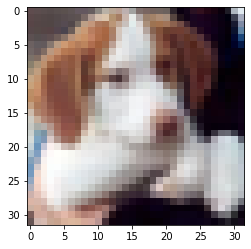

In [93]:
plt.imshow(my_image)

In [95]:
y_test[16]

array([5], dtype=uint8)

Our model is supposed to predict that it is a dog

In [96]:
model.predict(my_image.reshape(1,32,32,3))

array([[1.60485982e-07, 2.62807725e-06, 1.06844445e-05, 4.71571367e-03,
        8.32212834e-07, 9.95040238e-01, 1.35385733e-06, 2.13229636e-04,
        7.35513083e-07, 1.43951902e-05]], dtype=float32)

We can see that the 5th index of the array has the highest value so that's our predicted value